In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import cv2
from keras.models import Sequential, save_model, load_model
from keras import layers

In [61]:
data_folder = 'C:\\Users\\usaid\\Desktop\\notes\\WIDS\\Data'
df = pd.DataFrame(columns=['data', 'label'])

In [62]:
for label in os.listdir(data_folder):
    label_path = os.path.join(data_folder, label)
    
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            # Check if the file is a PNG image
            if image_file.lower().endswith(('.jpg')):
                image_path = os.path.join(label_path, image_file)
                with Image.open(image_path) as img:
                    img_data = np.array(img)
                df = pd.concat([df, pd.DataFrame({'image': [image_file], 'label': [label], 'data': [img_data]})])

In [63]:
df.reset_index(drop=True, inplace=True)
df.drop(['image'], inplace=True, axis=1)

In [64]:
df.head()

,data,label
0,"[[[255, 255, 253], [255, 255, 253], [255, 255,...",A
1,"[[[255, 254, 251], [255, 254, 253], [255, 253,...",A
2,"[[[254, 255, 255], [254, 255, 255], [254, 255,...",A
3,"[[[255, 255, 253], [255, 255, 253], [255, 255,...",A
4,"[[[255, 255, 253], [255, 255, 253], [255, 255,...",A


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    903 non-null    object
 1   label   903 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [66]:
df.columns

Index(['data', 'label'], dtype='object')

In [67]:
df['label'].value_counts()

label
B    257
C    180
L    160
D    156
A    150
Name: count, dtype: int64

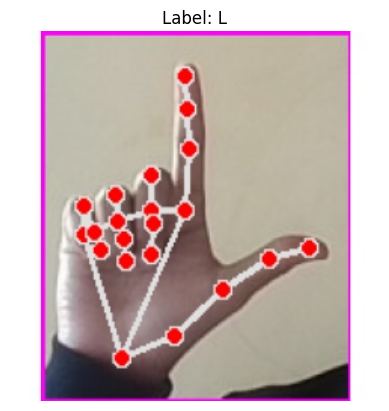

In [68]:
# Assuming df is your DataFrame
random_indices = random.sample(range(len(df)), 1)

for index in random_indices:
    row = df.iloc[index]
    img_data = row['data']
    label = row['label']

    # Plot the image
    plt.imshow(img_data)
    plt.title(f'Label: {label}')
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [70]:
# Define a mapping of string values to integers
mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'L': 4}

# Use the map function to replace string values with integers
df['label'] = df['label'].map(mapping)

In [71]:
df.head()

,data,label
0,"[[[255, 255, 253], [255, 255, 253], [255, 255,...",0
1,"[[[255, 254, 251], [255, 254, 253], [255, 253,...",0
2,"[[[254, 255, 255], [254, 255, 255], [254, 255,...",0
3,"[[[255, 255, 253], [255, 255, 253], [255, 255,...",0
4,"[[[255, 255, 253], [255, 255, 253], [255, 255,...",0


In [72]:
df['label'].value_counts()

label
1    257
2    180
4    160
3    156
0    150
Name: count, dtype: int64

In [74]:
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]
df_class_2 = df[df['label'] == 2]
df_class_3 = df[df['label'] == 3]
df_class_4 = df[df['label'] == 4]

df_class_0_over = df_class_0.sample(len(df_class_1), replace=True)
df_class_2_over = df_class_2.sample(len(df_class_1), replace=True)
df_class_3_over = df_class_3.sample(len(df_class_1), replace=True)
df_class_4_over = df_class_4.sample(len(df_class_1), replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1, df_class_2_over, df_class_3_over, df_class_4_over], axis=0)

print('Random over-sampling:')
print(df_test_over['label'].value_counts())

Random over-sampling:
label
0    257
1    257
2    257
3    257
4    257
Name: count, dtype: int64


In [75]:
df_test_over['data']

51     [[[255, 253, 253], [255, 254, 255], [254, 255,...
58     [[[255, 255, 253], [255, 255, 253], [255, 255,...
93     [[[255, 255, 255], [255, 255, 255], [255, 255,...
23     [[[255, 254, 251], [255, 254, 253], [255, 254,...
74     [[[255, 255, 253], [255, 255, 253], [255, 255,...
                             ...                        
796    [[[255, 255, 255], [255, 255, 255], [255, 255,...
893    [[[255, 255, 255], [255, 255, 255], [255, 255,...
776    [[[255, 255, 255], [255, 255, 255], [255, 255,...
864    [[[255, 255, 255], [255, 255, 255], [255, 255,...
761    [[[255, 255, 255], [255, 255, 255], [255, 255,...
Name: data, Length: 1285, dtype: object

In [76]:
X = df_test_over.drop('label', axis=1)
y = df_test_over['label']

In [77]:
X = np.array(X['data'].tolist())
#X = cv2.resize(X, (224,224))
y = np.array(y)

In [82]:
from skimage.transform import resize

reshaped_dataset = np.zeros((X.shape[0], 224, 224, 3), dtype=np.float32)

for i in range(X.shape[0]):
    reshaped_dataset[i] = resize(X[i], (224, 224, 3), anti_aliasing=True)

In [83]:
X = reshaped_dataset

In [84]:
X.shape

(1285, 224, 224, 3)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
df_test_over['label'].nunique()

5

In [87]:
df_test_over['label'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [88]:
data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [95]:
model1 = Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    data_augmentation,
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(df['label'].nunique(), activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
26/26 [==============================] - 9s 274ms/step - loss: 1.0719 - accuracy: 0.6691 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 2/5
26/26 [==============================] - 7s 264ms/step - loss: 0.0215 - accuracy: 0.9964 - val_loss: 4.3337e-04 - val_accuracy: 1.0000
Epoch 3/5
26/26 [==============================] - 7s 262ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 2.6543e-04 - val_accuracy: 1.0000
Epoch 4/5
26/26 [==============================] - 7s 266ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 6.9127e-06 - val_accuracy: 1.0000
Epoch 5/5
26/26 [==============================] - 7s 269ms/step - loss: 8.3524e-04 - accuracy: 1.0000 - val_loss: 2.6909e-06 - val_accuracy: 1.0000


In [96]:
predictions = model1.predict(X_test)

9/9 [==============================] - 1s 54ms/step


In [97]:
from sklearn.metrics import classification_report

# Convert probabilities to class predictions
y_pred = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        49

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



1/1 [==============================] - 0s 24ms/step


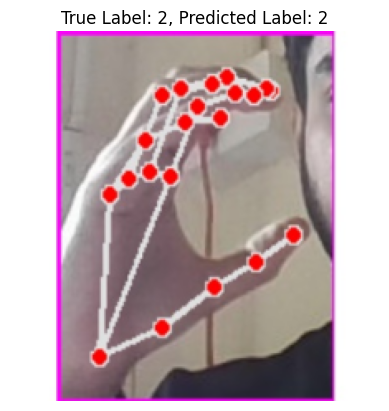

In [104]:
random_indices = random.sample(range(len(X_test)), 1)  # Adjust the number of samples as needed

for index in random_indices:
    img_data = X_test[index]
    true_label = y_test[index]

    # Reshape image data if necessary
    #img_data = img_data.reshape(-1, 224, 224, 3)

    # Make prediction
    prediction = model1.predict(np.expand_dims(img_data, axis=0))
    predicted_label = np.argmax(prediction)

    # Plot the image and predicted label
    plt.imshow(img_data)
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

In [105]:
model1.save('usaid_gesture_model_america.h5')

C:\Users\usaid\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
